In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [ ]:
!pip install -q ktrain

In [1]:
!pip install -q https://github.com/amaiya/eli5/archive/refs/heads/tfkeras_0_10_1.zip

In [5]:
import ktrain
from ktrain import text

In [6]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from IPython.display import Markdown
from IPython.display import display

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [7]:
data = pd.read_csv("./drive/MyDrive/Dataset/DSML/TrainVal.csv")
data.sample(10)

,tweet,label,tweet_cleaned,tweet_len
1211,People in Scotland have been banned from visit...,real,peopl scotland ban visit household indoor toug...,34
4275,Eight Southern states outside Texas and Florid...,real,eight southern state outsid texa florida curre...,16
4397,#IndiaFightsCorona Nearly 74% of the total Act...,real,indiafightscorona nearli 74 total activ case n...,30
2892,Drinking hot water ou tea kills the new corona...,fake,drink hot water ou tea kill new coronaviru can...,14
4263,President Barack Obama awarded $3.7 million to...,fake,presid barack obama award 7 million wuhan inst...,18
8,"???Clearly, the Obama administration did not l...",fake,clearli obama administr leav kind game plan so...,16
2435,Florida Reopens The Infamous Hurricane Beach h...,fake,florida reopen infam hurrican beach,11
6395,@GracieLuAnn24 @kevinfurr @PeterZeihan @alexis...,real,whole reason california switch peopl test test...,40
4816,There are 10 people with COVID-19 in our hospi...,real,10 peopl covid 19 hospit today 2 aucklandd cit...,44
755,Our daily update is published. We’ve now track...,real,daili updat publish track 22.5 million test 58...,34


In [8]:
data.tweet.str.split().apply(len).describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])

count    8560.00000
mean       26.94778
std        22.45087
min         3.00000
25%        15.00000
50%        25.00000
75%        37.00000
90%        44.00000
95%        47.00000
max      1456.00000
Name: tweet, dtype: float64

In [9]:
trn, val, preproc = text.texts_from_df(
    data,
    text_column = "tweet",
    label_columns="label",
    maxlen=60,
    ngram_range=2,
    random_state=41,
    preprocess_mode="bert"
)

['fake', 'real']
      fake  real
5065   1.0   0.0
4761   0.0   1.0
2623   1.0   0.0
7367   1.0   0.0
3498   1.0   0.0
['fake', 'real']
      fake  real
1214   1.0   0.0
6002   1.0   0.0
3262   1.0   0.0
5198   0.0   1.0
2164   0.0   1.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [10]:
model = text.text_classifier('bert', trn , preproc=preproc)

Is Multi-Label? False
maxlen is 60
done.


In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 60)]         0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 60)]         0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 60, 768),   23440896    ['Input-Token[0][0]']            
 g)                              (30522, 768)]                                                    
                                                                                                  
 Embedding-Segment (Embedding)  (None, 60, 768)      1536        ['Input-Segment[0][0]']    

In [12]:
learner = ktrain.get_learner(model, 
                             train_data=trn, 
                             val_data=val, 
                             batch_size=16)

In [12]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
482/482 [==============================] - 125s 210ms/step - loss: 0.4744 - accuracy: 0.7687
Epoch 2/1024
482/482 [==============================] - 106s 219ms/step - loss: 0.3316 - accuracy: 0.8397
Epoch 3/1024
482/482 [==============================] - 16s 33ms/step - loss: 0.7801 - accuracy: 0.4696


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


Two possible suggestions for LR from plot:
	Min numerical gradient: 8.80E-06
	Min loss divided by 10: 7.55E-06


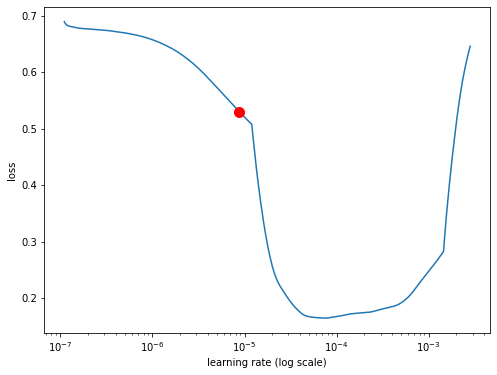

In [13]:
learner.lr_plot(suggest=True)

In [13]:
import gc
gc.collect()

1403

In [14]:
learner.fit_onecycle(8.80E-06, 3)



begin training using onecycle policy with max lr of 8.8e-06...
Epoch 1/3
482/482 [==============================] - 126s 223ms/step - loss: 0.3017 - accuracy: 0.8685 - val_loss: 0.1275 - val_accuracy: 0.9498
Epoch 2/3
482/482 [==============================] - 107s 221ms/step - loss: 0.1068 - accuracy: 0.9602 - val_loss: 0.0706 - val_accuracy: 0.9708
Epoch 3/3
482/482 [==============================] - 108s 224ms/step - loss: 0.0398 - accuracy: 0.9884 - val_loss: 0.0763 - val_accuracy: 0.9685


In [15]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [16]:
test_data = pd.read_csv("./drive/MyDrive/Dataset/DSML/TestLabel.csv", index_col=0)
test_data.sample(10)

,tweet,label
id,,
53,There has been a pandemic every 100 years,fake
1130,CoronaVac a vaccine that is being developed in...,fake
2058,A possibility for #COVID19 patients to wean of...,real
1362,An alleged bot system on Twitter controlled by...,fake
1397,Our daily update is published. We’ve now track...,real
1033,Handy Tips to Stay Productive While ‘Shelterin...,fake
1004,Lot of young bankers are affected by Corona Vi...,fake
1278,The Business brothers of Kolar sold land for ₹...,fake
878,#CoronaVirusUpdates: 📍Total #COVID19 Cases in ...,real


In [17]:
probs = predictor.predict_proba(test_data["tweet"].values)
probs[:5]

array([[0.00193065, 0.99806935],
       [0.9983583 , 0.00164168],
       [0.9988937 , 0.00110631],
       [0.00271901, 0.99728096],
       [0.00229026, 0.99770975]], dtype=float32)

In [18]:
y = test_data.label == "real"
y.head()

id
1     True
2    False
3    False
4     True
5     True
Name: label, dtype: bool

In [19]:
import metrics as mmetrics

In [20]:
y = y.values.reshape((-1, 1))

perfs = mmetrics.get_performance_metrics(y, probs[:, 1:], ["bert"])
perfs

,TP,TN,FP,FN,Accuracy,Prevalence,Sensitivity,Specificity,PPV,NPV,AUC,F1,Threshold
,,,,,,,,,,,,,
bert,1101,982,38,19,0.973,0.523,0.983,0.963,0.967,0.981,0.996,0.975,0.5


In [21]:
print(test_data["tweet"].values[10:15])

['Two interesting correlations:\n\n1) Children tend to weather COVID-19 pretty well; they also get a ton of Vitamin D.\n\n2) Black people are getting slammed by COVID-19; black people also have much higher instances of Vitamin D deficiency (76% vs 40% in the general population).'
 'A photo shows a 19-year-old vaccine for canine coronavirus that could be used to prevent the new coronavirus causing COVID-19.'
 '🇰🇼 Assistant Undersecretary for Public Health Affairs Dr Buthayna Almodaf highlighted the importance of risk communication &amp; public education in fighting #COVID19. The country increased testing capacity enabling 400000 people to be tested.'
 'An audio file by an alleged worker at a health institution in Rio de Janeiro. She says that healthcare workers on public institutions in Rio are forced to state whether a patient has COVID-19 or not even before he sees a doctor. This was allegedly being done to artificially inflate the number of cases.'
 'Says the Coronavirus Aid, Relief,

In [22]:
example = 'Two interesting correlations:\n\n1) Children tend to weather COVID-19 pretty well; they also get a ton of Vitamin D.\n\n2) Black people are getting slammed by COVID-19; black people also have much higher instances of Vitamin D deficiency (76% vs 40% in the general population).'
len(example.split())

45

In [23]:
predictor.predict([example])

['real']

In [24]:
predictor.predict([example], return_proba=True)

array([[0.18855925, 0.81144077]], dtype=float32)

In [25]:
predictor.explain(example)

In [26]:
learner.view_top_losses(n=10, preproc=preproc, val_data=val)

----------
id:762 | loss:5.18 | true:fake | pred:real)

[CLS] in aura ##nga ##ba , co ##vid antibody testing in private lab available now . https : / / t . co / vp ##mi ##4 ##ns ##my ##v [SEP]
----------
id:726 | loss:4.91 | true:real | pred:fake)

[CLS] we ' re going through the same grief but we were on the other side of the wall to each other when it happened . hospital # corona ##virus rules kept couple apart during mis ##carriage https : / / t . co / l ##s ##18 ##xa ##e ##8 ##8 ##y [SEP]
----------
id:365 | loss:4.82 | true:fake | pred:real)

[CLS] rt @ ac ##mad ##ot ##go ##v : during # co ##vid ##19 false information about the virus is circulating online . you can take steps to protect yourself by : • che … [SEP]
----------
id:792 | loss:4.36 | true:fake | pred:real)

[CLS] # co ##va ##xin , india ' s indigenous # co ##vid ##19 vaccine is developed by @ b ##harat ##bio ##tech in collaboration with @ ic ##m ##r _ ni ##v . pre ##cl ##ini ##cal studies with small and large animals s

In [27]:
example = "rt @ ac ##mad ##ot ##go ##v : during # co ##vid ##19 false information about the virus is circulating online . you can take steps to protect yourself by : • che …"

In [28]:
predictor.explain(example)